In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("processed_log1.md", sep=" ")
df.head()

,Problem,Search,Actions,Expansions,Goal_Tests,New_Nodes,Plan_Length,Time_Elapsed
0,AirCargoProblem1,breadth_first_search,20,43,56,178,6,0.020445
1,AirCargoProblem1,depth_first_graph_search,20,21,22,84,20,0.006557
2,AirCargoProblem1,uniform_cost_search,20,60,62,240,6,0.016912
3,AirCargoProblem1,greedy_best_first_graph_searchwithh_unmet_goals,20,7,9,29,6,0.001875
4,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_levelsum,20,6,8,28,6,0.666980


### 1.Use a table or chart to analyze the number of nodes expanded against number of actions in the domain

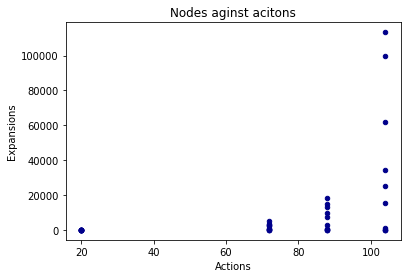

In [9]:
df.plot.scatter(x="Actions", y="Expansions", c='DarkBlue', title='Nodes aginst acitons')
plt.show()

Answer: There is a positive correlation between the two factors. As the problem size increases, the average number of nodes expanded increases too, and the expansions variance of different algorithms also increases. 

### 2.Use a table or chart to analyze the search time against the number of actions in the domain

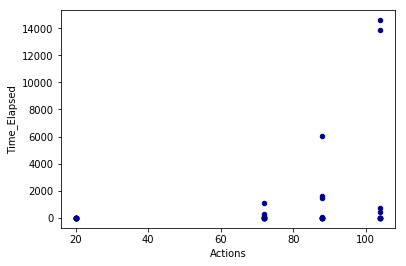

In [12]:
df.plot.scatter(x="Actions", y="Time_Elapsed", c='DarkBlue')
plt.show()

Answer: There is a positive correlation between the two factors. As the problem size increases, the average Time_Elapsed increases too, and the Time_Elapsed variance of different algorithms also increases.

### 3.Use a table or chart to analyze the length of the plans returned by each algorithm on all search problems

In [40]:
df.pivot(index="Search", columns="Problem", values="Plan_Length")

Problem,AirCargoProblem1,AirCargoProblem2,AirCargoProblem3,AirCargoProblem4
Search,,,,
astar_searchwithh_pg_levelsum,6.0,9.0,12.0,15.0
astar_searchwithh_pg_maxlevel,6.0,9.0,12.0,14.0
astar_searchwithh_pg_setlevel,6.0,9.0,12.0,NaN
astar_searchwithh_unmet_goals,6.0,9.0,12.0,14.0
breadth_first_search,6.0,9.0,12.0,14.0
depth_first_graph_search,20.0,619.0,392.0,24132.0
greedy_best_first_graph_searchwithh_pg_levelsum,6.0,9.0,14.0,17.0
greedy_best_first_graph_searchwithh_pg_maxlevel,6.0,9.0,13.0,17.0
greedy_best_first_graph_searchwithh_pg_setlevel,6.0,10.0,19.0,25.0


Answer: The depth_first_graph_search generate longest plan length and then is the greedy_best_first_graph_search.

### 4.Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?

In [13]:
df.groupby(["Problem"]).min()["Actions"]

Problem
AirCargoProblem1     20
AirCargoProblem2     72
AirCargoProblem3     88
AirCargoProblem4    104
Name: Actions, dtype: int64

In [53]:
df.loc[df.Problem == "AirCargoProblem1",["Problem", "Search", "Time_Elapsed"]].sort_values(by="Time_Elapsed")

,Problem,Search,Time_Elapsed
3,AirCargoProblem1,greedy_best_first_graph_searchwithh_unmet_goals,0.001875
1,AirCargoProblem1,depth_first_graph_search,0.006557
7,AirCargoProblem1,astar_searchwithh_unmet_goals,0.013105
2,AirCargoProblem1,uniform_cost_search,0.016912
0,AirCargoProblem1,breadth_first_search,0.020445
5,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_maxlevel,0.234453
9,AirCargoProblem1,astar_searchwithh_pg_maxlevel,0.322859
8,AirCargoProblem1,astar_searchwithh_pg_levelsum,0.360759
4,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_levelsum,0.666980
10,AirCargoProblem1,astar_searchwithh_pg_setlevel,1.031665


Answer: greedy_best_first_graph_searchwithh_unmet_goals or depth_first_graph_search

### 5.Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)  

In [54]:
df.loc[df.Problem == "AirCargoProblem4",["Problem", "Search", "Time_Elapsed"]].sort_values(by="Time_Elapsed")

,Problem,Search,Time_Elapsed
36,AirCargoProblem4,greedy_best_first_graph_searchwithh_unmet_goals,0.024215
40,AirCargoProblem4,astar_searchwithh_unmet_goals,4.126687
33,AirCargoProblem4,breadth_first_search,5.505404
37,AirCargoProblem4,greedy_best_first_graph_searchwithh_pg_levelsum,6.883281
35,AirCargoProblem4,uniform_cost_search,8.394633
38,AirCargoProblem4,greedy_best_first_graph_searchwithh_pg_maxlevel,14.741153
41,AirCargoProblem4,astar_searchwithh_pg_levelsum,437.795106
34,AirCargoProblem4,depth_first_graph_search,767.090839
39,AirCargoProblem4,greedy_best_first_graph_searchwithh_pg_setlevel,13833.821295
42,AirCargoProblem4,astar_searchwithh_pg_maxlevel,14585.299921


Answer: greedy_best_first_graph_searchwithh_unmet_goals.

### 6.Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?  

Answer: astar_searchwithh_unmet_goals, breadth_first_search, uniform_cost_search